<a href="https://colab.research.google.com/github/JefNtungila/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jef_Ntungila_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [4]:
import io

column_headers=['Age of patient','Year of operation','Positive axillary nodes', 'Survival status']

# 1. Age of patient at time of operation (numerical) 
# 2. Patient's year of operation (year - 1900, numerical) 
# 3. Number of positive axillary nodes detected (numerical) 
# 4. Survival status (class attribute) 
# -- 1 = the patient survived 5 years or longer 
# -- 2 = the patient died within 5 year

patients_data = pd.read_csv(io.BytesIO(uploaded['haberman.csv']), header=None, names=column_headers)
patients_data.head()

,Age of patient,Year of operation,Positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
patients_data.isna().sum()

Age of patient             0
Year of operation          0
Positive axillary nodes    0
Survival status            0
dtype: int64

In [6]:
list1 = patients_data['Survival status'].tolist()

dic = {1: 1, 2: 0}

list2 = [ dic.get(item,item) for item in list1] 

patients_data['Survival status'] = list2
         
patients_data['Survival status'].head(20) #chose to print 20 instead of 5 because otherwise you cannot see that the dictionary actually worked


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Survival status, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [7]:
patients_data.describe(include='all') #For some reason survival status doesn't want to show up checking for NaN values it comes u

,Age of patient,Year of operation,Positive axillary nodes,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [8]:
patients_data.dropna() #oh hey Survival status is back


,Age of patient,Year of operation,Positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


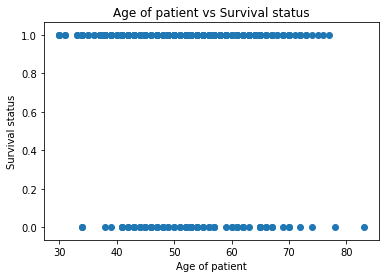

In [11]:
import matplotlib.pyplot as plt

plt.scatter(patients_data['Age of patient'], patients_data['Survival status']);
plt.title('Age of patient vs Survival status')
plt.xlabel('Age of patient')
plt.ylabel('Survival status')
plt.show()

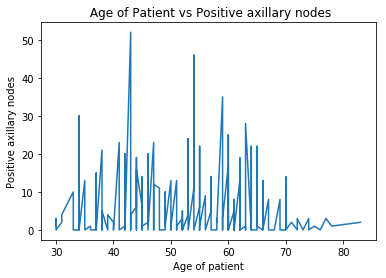

In [12]:
plt.plot(patients_data['Age of patient'], patients_data['Positive axillary nodes']);
plt.title(' Age of Patient vs Positive axillary nodes')
plt.xlabel('Age of patient')
plt.ylabel('Positive axillary nodes')
plt.show()

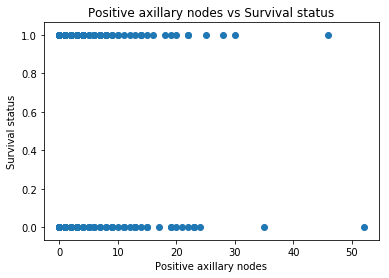

In [13]:
plt.scatter(patients_data['Positive axillary nodes'], patients_data['Survival status']);
plt.title('Positive axillary nodes vs Survival status')
plt.xlabel('Positive axillary nodes')
plt.ylabel('Survival status')
plt.show()

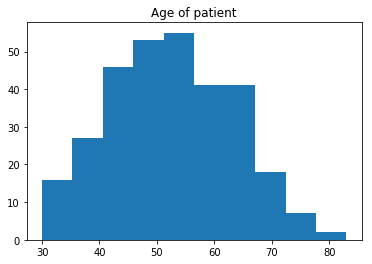

In [14]:
plt.hist(patients_data['Age of patient'], bins=10)
plt.title('Age of patient')
plt.show()


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Under 35 years old you very much guarenteed to live, above 78 years old the likelihood of surviving another 5 years after the surgery becomes 0. Patients in this data set were more likely to have the illness around 50 years of age.

I wanted to see if a potential relationship could be found between positive axillary nodes and the likelihood of survival. The data observed is very clear that such relationship does not exist. 